In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import math

In [39]:
d = pd.DataFrame()

In [40]:



dates = pd.date_range(
    start="2018/01/01",
    end="2020/12/31",
    freq="1h"
)

dates


DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2020-12-30 15:00:00', '2020-12-30 16:00:00',
               '2020-12-30 17:00:00', '2020-12-30 18:00:00',
               '2020-12-30 19:00:00', '2020-12-30 20:00:00',
               '2020-12-30 21:00:00', '2020-12-30 22:00:00',
               '2020-12-30 23:00:00', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', length=26281, freq='H')

In [41]:
d['date'] = dates

print(d.date.dt.dayofyear)
print(d.date.dt.hour)


0          1
1          1
2          1
3          1
4          1
        ... 
26276    365
26277    365
26278    365
26279    365
26280    366
Name: date, Length: 26281, dtype: int32
0         0
1         1
2         2
3         3
4         4
         ..
26276    20
26277    21
26278    22
26279    23
26280     0
Name: date, Length: 26281, dtype: int32


In [42]:
d['Y'] = d.date.dt.year
d['N'] = d.date.dt.dayofyear

In [43]:
def getE(n,y):       
    if(y%4) == 0:
        gamma = 2 * math.pi * (n-1)/366
    else:
        gamma = 2 * math.pi * (n-1)/365


    cosg = math.cos(gamma) 
    sing = math.sin(gamma)

    cos2g = math.cos(2*gamma)
    sin2g = math.sin(2*gamma)
    E = 229.18 * (0.000075+ 0.001868 * cosg - 0.032077*sing - 0.014615*cos2g - 0.04089* sin2g )
    return E
        
        

In [44]:

d['E'] = list(map(getE, d['N'], d['Y']))

print(d.E)

0       -2.904169
1       -2.904169
2       -2.904169
3       -2.904169
4       -2.904169
           ...   
26276   -2.001171
26277   -2.001171
26278   -2.001171
26279   -2.001171
26280   -2.454372
Name: E, Length: 26281, dtype: float64


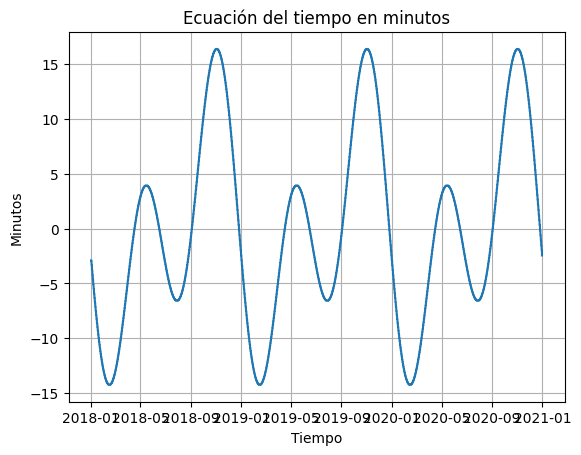

In [45]:
#grafico de la ecuación del tiempo en minutos
plt.figure()
plt.title("Ecuación del tiempo en minutos")
plt.plot(d.date, d.E)
plt.grid()
plt.xlabel("Tiempo")
plt.ylabel("Minutos")
plt.show()

In [46]:
d['HR'] = d['date'].dt.hour + (d['date'].dt.minute) /60 + (d['date'].dt.second)/3600

In [48]:
def getHS(gmt,long):
        A = 1
        if gmt<=0:
            A = -1
        return d['HR'] + (4 * ((A * 15 * gmt)- (A * long))+ d['E'])/60
    
d['HS'] = getHS(-3, -24.7)

print(d.HS)

0         1.304931
1         2.304931
2         3.304931
3         4.304931
4         5.304931
           ...    
26276    21.319980
26277    22.319980
26278    23.319980
26279    24.319980
26280     1.312427
Name: HS, Length: 26281, dtype: float64


In [50]:
def delta(n, y):
        
        if(y%4) == 0:
            gamma = 2 * math.pi * (n-1)/366
        else:
            gamma = 2 * math.pi * (n-1)/365
            
        delta = 0.006918 - 0.399912 * math.cos(gamma) + 0.070257 * math.sin(gamma) - 0.006758 * math.cos(2*gamma) + 0.000907*math.sin(2*gamma) - 0.002697*math.cos(3*gamma)+ 0.00148*math.sin(3*gamma)
        return delta

In [52]:
d['deltaRad'] = list(map(delta, d.N, d.Y ))

#Convierte radianes a grados
d['delta'] = d['deltaRad'].apply(math.degrees)


## Ángulo horario

In [ ]:
self.df['w'] = 15 * (12 - self.df['HS'])    
self.df['wRad'] = self.df['w'].apply(math.radians)